# MATH 210 Introduction to Mathematical Computing

**March 31, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Polynomial Interpolation

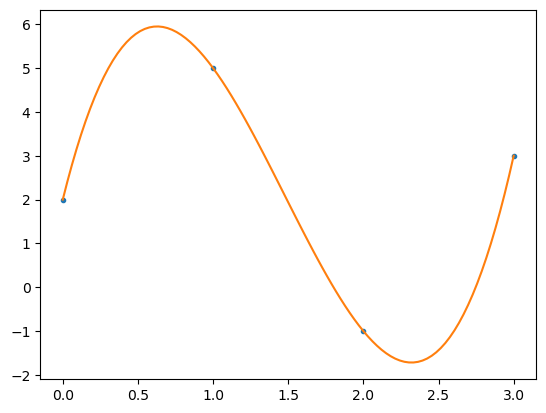

In [2]:
x = np.array([0.,1.,2.,3.])
y = np.array([2.,5.,-1.,3.])

A = np.vander(x,increasing=True)
c = la.solve(A,y)

xs = np.linspace(0,3,100)
ys = c[0] + c[1]*xs + c[2]*xs**2 + c[3]*xs**3
# f = lambda x: sum([c[k]*x**k for k in range(len(c))])
# ys = f(xs)

plt.plot(x,y,'.')
plt.plot(xs,ys)
plt.show()

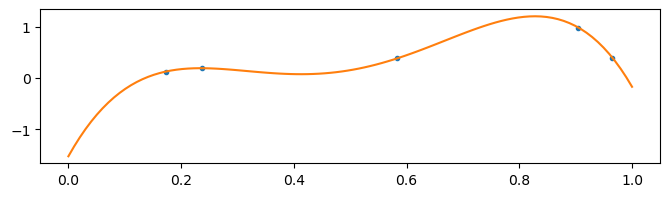

In [3]:
N = 4
x = np.random.rand(N+1)
y = np.random.rand(N+1)
A = np.vander(x,increasing=True)
c = la.solve(A,y)
xs = np.linspace(0,1,100)
f = lambda x: sum([c[k]*x**k for k in range(len(c))])
ys = f(xs)
plt.figure(figsize=(8,2))
plt.plot(x,y,'.'), plt.plot(xs,ys)
plt.show()

## General Interpolation

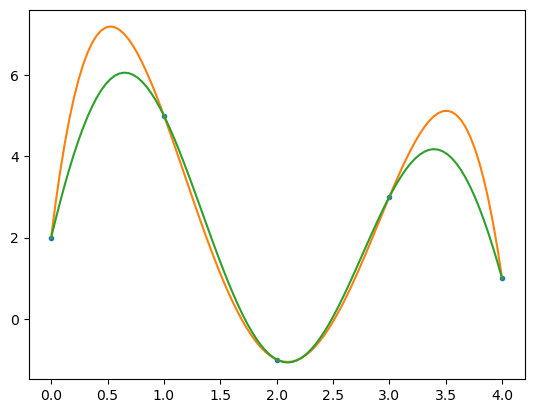

In [4]:
x = np.array([0.,1.,2.,3.,4.])
y = np.array([2.,5.,-1.,3.,1.])

A1 = np.vander(x,increasing=True)
c1 = la.solve(A1,y)

xs = np.linspace(0,4,100)
ys1 = c1[0] + c1[1]*xs + c1[2]*xs**2 + c1[3]*xs**3 + c1[4]*xs**4

# f(x) = a0 + a1*cos(x) + a2*cos(2*x) + b1*sin(x) + b2*sin(2*x)
A2 = np.column_stack([np.ones(len(x)),np.cos(x),np.cos(2*x),np.sin(x),np.sin(2*x)])
c2 = la.solve(A2,y)
ys2 = c2[0] + c2[1]*np.cos(xs) + c2[2]*np.cos(2*xs) + c2[3]*np.sin(xs) + c2[4]*np.sin(2*xs)

plt.plot(x,y,'.')
plt.plot(xs,ys1)
plt.plot(xs,ys2)
plt.show()

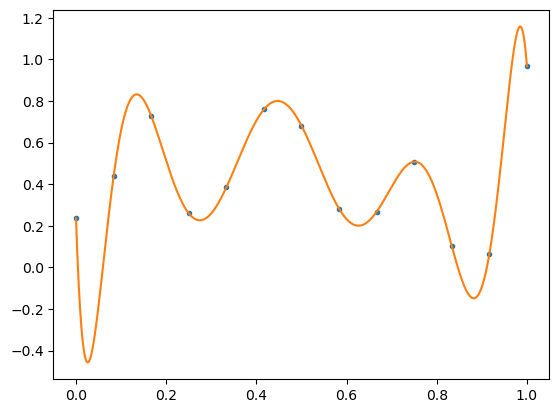

In [17]:
N = 6
x = np.linspace(0,1,2*N+1)
y = np.random.rand(2*N+1)

cosines = [np.cos(k*x) for k in range(1,N+1)]
sines = [np.sin(k*x) for k in range(1,N+1)]
A = np.column_stack([np.ones(len(x)),*cosines,*sines])

c = la.solve(A,y)

def f(x):
    ak = sum([c[k]*np.cos(k*x) for k in range(1,N+1)])
    bk = sum([c[k + N]*np.sin(k*x) for k in range(1,N+1)])
    return c[0] + ak + bk

xs = np.linspace(0,1,1001)
ys = f(xs)

plt.plot(x,y,'.')
plt.plot(xs,ys)
plt.show()